## Lighthouse Program - IMDB Rating
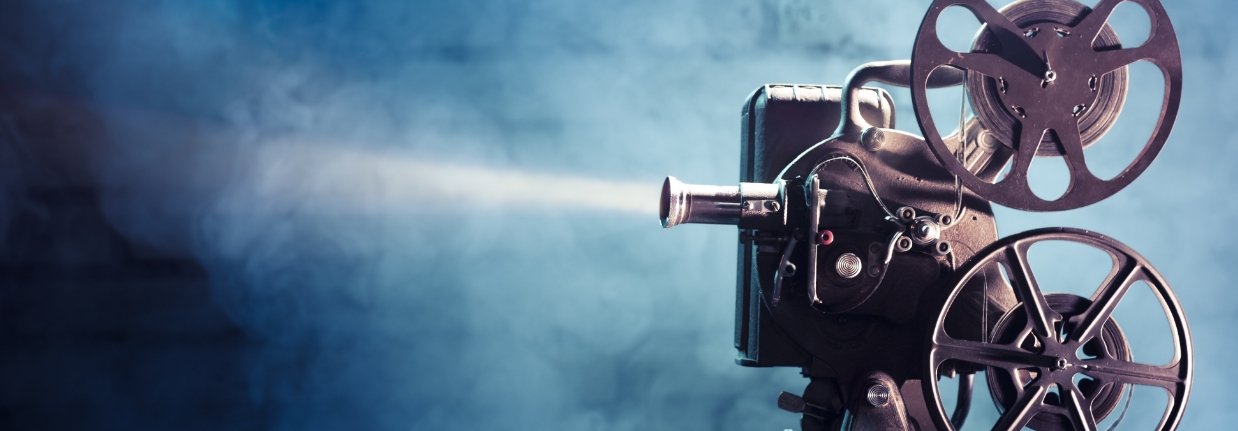
#### - Desafio 
Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).l seria a nota do IMDB?


##### Dicionário de Dados
```
Series_Title – Nome do filme
Released_Year - Ano de lançamento
Certificate - Classificação etária
Runtime – Tempo de duração
Genre - Gênero
IMDB_Rating - Nota do IMDB
Overview - Overview do filme
Meta_score - Média ponderada de todas as críticas 
Director – Diretor
Star1 - Ator/atriz #1
Star2 - Ator/atriz #2
Star3 - Ator/atriz #3
Star4 - Ator/atriz #4
No_of_Votes - Número de votos
Gross - Faturamento
```

#### Passos e Perguntas a serem respondidas
1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!
   
2. Responda também às seguintes perguntas:
```
a. Qual filme você recomendaria para uma pessoa que você não conhece?
b. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
c. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

```

3. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

4. Supondo um filme com as seguintes características:
```
 'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}
```
- Qual seria a nota do IMDB?

5. Salve o modelo desenvolvido no formato .pkl

6. A entrega deve ser feita através de um repositório de código público que contenha
``` 
- README explicando como instalar e executar o projeto
- Arquivo de requisitos com todos os pacotes utilizados e suas versões
- Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
- Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
- Arquivo .pkl conforme passo 5 acima.
- Todos os códigos produzidos devem seguir as boas práticas codificação.
```

### Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler, OneHotEncoder, LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

### Importando a Base de Dados

In [2]:
df = pd.read_csv("desafio_indicium_imdb.csv")
display(df.head())

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


### Limpando/Tratando a Base de Dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


##### Observações:
- Unnamed: 0 desnecessária
- Released_Year, Gross precisam estar definidas como colunas numéricas
- A coluna Runtime irei tirar o "min" para transformá-la em uma coluna numérica

- Excluir coluna desnecessária "Unnamed: 0"

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

- Mudar o tipo de coluna de "Released_Year", "Gross" e "Runtime" para numérica

In [5]:
df['Gross'] = df['Gross'].str.replace(',', '') #Substituindo a vírgula
df['Runtime'] = df['Runtime'].str.replace('min', '') #Subitituindo o 'min'

In [6]:
def verifica_ano_formatado(string):
    try:
        datetime.strptime(string, "%Y")
        return True
    except ValueError:
        return False

# Exemplo de uso:
for ano in df['Released_Year'][-40:970]:  
    if verifica_ano_formatado(ano):
        print(f"{ano} é um ano válido.")
    else:
        print(f"{ano}")

1996 é um ano válido.
1997 é um ano válido.
1995 é um ano válido.
1995 é um ano válido.
1995 é um ano válido.
1995 é um ano válido.
PG
1994 é um ano válido.
1993 é um ano válido.
1993 é um ano válido.
1992 é um ano válido.


- Por algum motivo não estava conseguindo transformar a coluna 'Released_Year', formatada como 'object', para uma coluna numérica. Descobri então, que havia uma linha em que estava escrito "PG" ao invés de uma data :(
  
- Sendo assim, ao invés de excluir a linha, pesquisei o ano em que o filme Apollo 13 foi lançado e vou substituir "PG" por este ano, que foi 1995.

In [7]:
df['Released_Year'] = df['Released_Year'].replace('PG', 1995)

In [8]:
df['Gross'] = df['Gross'].astype('float32')
df['Runtime'] = df['Runtime'].astype('int32') 
df['Released_Year'] = df['Released_Year'].astype('int32') 

df.dtypes

Series_Title      object
Released_Year      int32
Certificate       object
Runtime            int32
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float32
dtype: object

- Verificando a proporção de valores vazios

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percentual = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

tabela = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'], sort=False).sort_values('Total', ascending=False)
display(tabela)

,Total,Percentual
Gross,169,0.169169
Meta_score,157,0.157157
Certificate,101,0.101101
Runtime,0,0.000000
Genre,0,0.000000
Series_Title,0,0.000000
Released_Year,0,0.000000
Overview,0,0.000000
IMDB_Rating,0,0.000000
Star1,0,0.000000


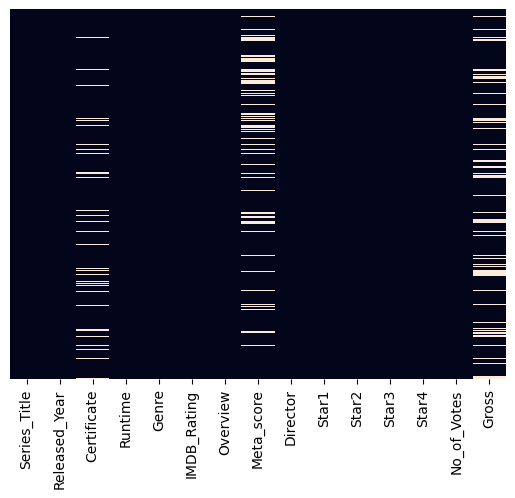

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False);

In [11]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,999.000000,842.000000,9.990000e+02,830.0
mean,1991.218218,122.871872,7.947948,77.969121,2.716214e+05,68082576.0
std,23.297166,28.101227,0.272290,12.383257,3.209126e+05,109807552.0
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1305.0
25%,1976.000000,103.000000,7.700000,70.000000,5.547150e+04,3245338.5
50%,1999.000000,119.000000,7.900000,79.000000,1.383560e+05,23457440.0
75%,2009.000000,137.000000,8.100000,87.000000,3.731675e+05,80876336.0
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,936662208.0


##### Observações:
- Substituir os valores nulos da coluna de faturamento("Gross") pela média seria uma opção, mas vendo a tabela acima, o desvio padrão, tanto quanto os valores mínimos e máximos, possuem uma diferença enorme. Considerando também que a porcentagem de valores nulos nessa coluna não é alta, optarei por exluir esses valores ao invés de tentar substituí-los.

In [12]:
df.isnull().sum().sort_values(ascending=False).head()

Gross          169
Meta_score     157
Certificate    101
Runtime          0
Genre            0
dtype: int64

In [13]:
df.shape

(999, 15)

In [14]:
#Calculando a moda de Certificate por Genre
certificate_mode_by_genre = df.groupby('Genre')['Certificate'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

#Exibindo as modas calculadas
print("Modas por Genre:")
print(certificate_mode_by_genre)

#Preenchendo os valores vazios na coluna 'Certificate' com as modas correspondentes por Genre.
df['Certificate'] = df.apply(lambda row: certificate_mode_by_genre.loc[certificate_mode_by_genre['Genre'] == row['Genre'], 'Certificate'].values[0] if pd.isnull(row['Certificate']) else row['Certificate'], axis=1)

#Para cada linha(row) do dataframe, ele verifica se o valor em Certificate pe nulo. 
#Se for nulo, substitui pela moda correspondente ao Genre daquela linha, 
#caso o contrário, mantém o valor existente em Certificate.

Modas por Genre:
                            Genre Certificate
0               Action, Adventure           A
1    Action, Adventure, Biography        None
2       Action, Adventure, Comedy          UA
3        Action, Adventure, Crime        None
4        Action, Adventure, Drama          UA
..                            ...         ...
197    Mystery, Romance, Thriller           A
198     Mystery, Sci-Fi, Thriller           A
199             Mystery, Thriller           A
200                      Thriller        None
201                       Western           A

[202 rows x 2 columns]


In [15]:
df.isnull().sum().sort_values(ascending=False).head()

Gross          169
Meta_score     157
Certificate     11
Runtime          0
Genre            0
dtype: int64

In [16]:
df.dropna(how='any', inplace=True)
df.shape

(747, 15)

In [17]:
df.isnull().sum().sort_values(ascending=False).head()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
dtype: int64

- Conferindo se há algum filme repetido

In [18]:
df.Series_Title.nunique()

747

### Análise Exploratória (EDA) + Respondendo as Perguntas 

#### 1. Qual filme você recomendaria para uma pessoa que você não conhece?

- Por ser uma pessoa que eu não conheço, recomendaria um filme mais votado e de acordo com a opnião popular.

##### Top 10 em relação ao No_of_Votes

In [19]:
top_votes = df.loc[:, ['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'No_of_Votes']]
top_votes =  top_votes.sort_values(by='No_of_Votes', ascending=False)
display(top_votes.head(10))

,Series_Title,Released_Year,Certificate,Runtime,Genre,No_of_Votes
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",2303232
7,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",2067042
8,Fight Club,1999,A,139,Drama,1854740
5,Pulp Fiction,1994,A,154,"Crime, Drama",1826188
10,Forrest Gump,1994,UA,142,"Drama, Romance",1809221
13,The Matrix,1999,A,136,"Action, Sci-Fi",1676426
9,The Lord of the Rings: The Fellowship of the Ring,2001,U,178,"Action, Adventure, Drama",1661481
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",1642758
0,The Godfather,1972,A,175,"Crime, Drama",1620367
62,The Dark Knight Rises,2012,UA,164,"Action, Adventure",1516346


##### Ordenando os filmes de acordo com a Nota do IMDB, Número de Votos, e Metascore respectivamente. 
`Mas...Por que nessa ordem?`

- Para recomendar um filme para um pessoa que eu não conheço, levaria a opinião do público como principal fator a ser considerado. O primeiro parâmetro será o IMDb Rating, já que é uma avaliação feita pelos usuários do Internet Movie Database (IMDb), onde eles classificam filmes, séries e outros tipos de produções audiovisuais em uma escala de 1 a 10, que esultam em uma nota única exibida na página principal do título.
- O segundo a ser considerado será o número de votos. Claro que um filme tendo maior número de votos, não significa automaticamente que seja um bom filme. Mas, um filme com muitos votos e ainda ter sido avaliado com uma nota boa pelo público, é um ótimo indicador. 
- Já o Metascore é uma nota exibida no IMDb, mas que não é levada em consideração na avaliação geral. Ele é baseado nas avaliações de mídias especializadas com base nas análises de críticos profissionais, servrá mais como uma informação adicional, já que o objetivo aqui é a opnião popular. 


In [20]:
df_popular = df.sort_values(['IMDB_Rating', 'No_of_Votes', 'Meta_score'], ascending=False).reset_index()
df_popular.drop('index', axis=1, inplace=True)
df_popular.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966416.0
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858432.0
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928760.0


- Vendo acima, são filmes mais antigos. E quanto os mais atuais, a partir dos anos 2000?

In [21]:
df_atuais_popular = df.loc[df['Released_Year']>=2000].sort_values(['IMDB_Rating', 'No_of_Votes', 'Meta_score'], ascending=False).reset_index()
df_atuais_popular.drop('index', axis=1, inplace=True)
df_atuais_popular.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858432.0
1,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845920.0
2,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576192.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,U,178,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,315544736.0
4,The Lord of the Rings: The Two Towers,2002,UA,179,"Action, Adventure, Drama",8.7,While Frodo and Sam edge closer to Mordor with...,87.0,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1485555,342551360.0


##### Analisando os `gêneros` predominantes `antes` e `depois dos anos 2000`
- Antes de 2000

,Genre,Gross
0,Drama,1.317762e+09
1,"Drama, Romance",1.312324e+09
2,"Action, Adventure, Fantasy",9.223406e+08
3,"Animation, Adventure, Comedy",8.114510e+08
4,"Action, Adventure, Sci-Fi",7.022680e+08


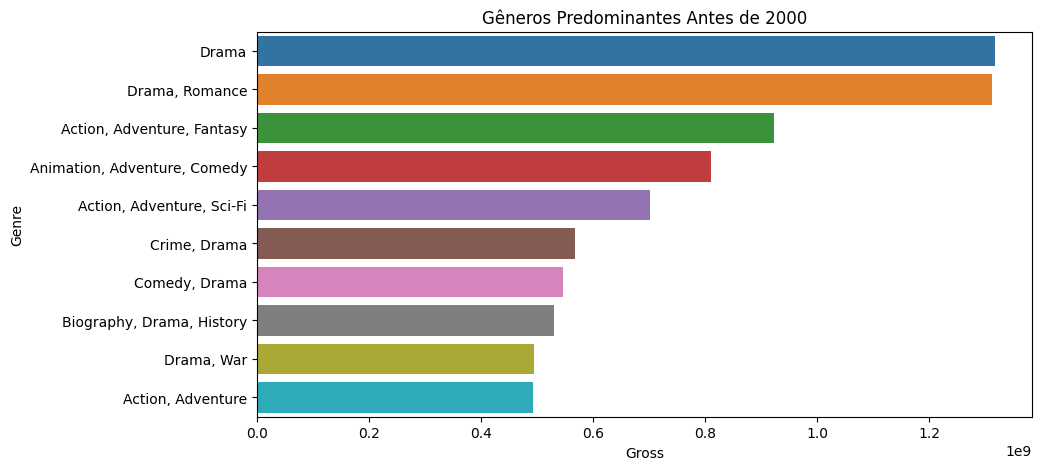

In [22]:
df_antes_2000 = df.loc[df['Released_Year']<2000, ['Series_Title', 'Released_Year', 'Genre', 'Gross']].sort_values(by='Gross', ascending=False)
df_antes_2000= df_antes_2000.loc[:, ['Genre', 'Gross']].groupby('Genre').sum().sort_values(by='Gross', ascending=False).reset_index()
display(df_antes_2000.head())

plt.figure(figsize=(10, 5))
sns.barplot(x='Gross', y='Genre', hue ='Genre', data=df_antes_2000.head(10))
plt.title('Gêneros Predominantes Antes de 2000')
plt.show()

- A partir de 2000

,Genre,Gross
0,"Action, Adventure, Sci-Fi",5.196391e+09
1,"Animation, Adventure, Comedy",3.691887e+09
2,"Action, Adventure, Drama",2.593061e+09
3,"Animation, Action, Adventure",1.983160e+09
4,"Action, Adventure, Comedy",1.853972e+09


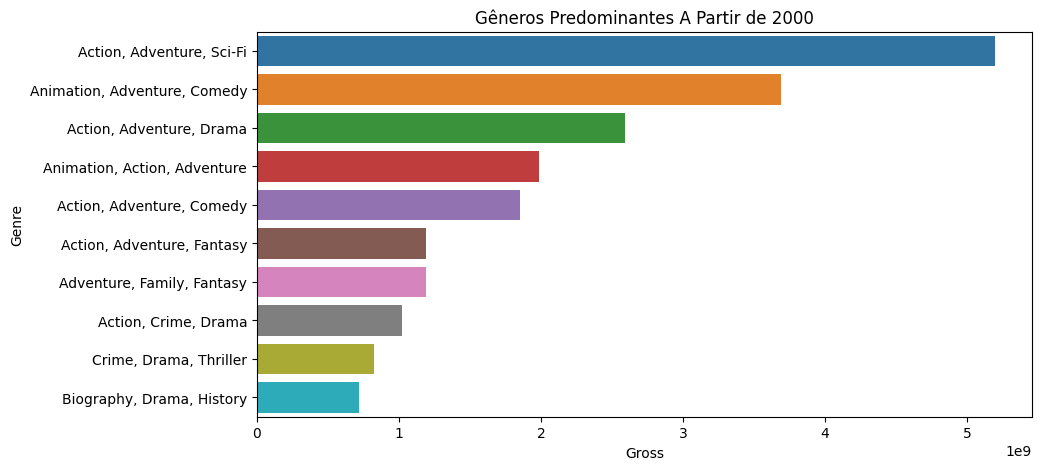

In [23]:
df_depois_2000 = df.loc[df['Released_Year']>=2000, ['Series_Title', 'Released_Year', 'Genre', 'Gross']].sort_values(by='Gross', ascending=False)
df_depois_2000 = df_depois_2000.loc[:, ['Genre', 'Gross']].groupby('Genre').sum().sort_values(by='Gross', ascending=False).reset_index()
display(df_depois_2000.head())

plt.figure(figsize=(10, 5))
sns.barplot(x='Gross', y='Genre', hue ='Genre', data=df_depois_2000.head(10))
plt.title('Gêneros Predominantes A Partir de 2000')
plt.show()

##### Os melhores filmes foram:
    - The Godfather (1972)
    - The Dark Knight (2008)
    
#### Conclusão:

Se fosse para recomendar um filme para uma pessoa que eu não conheço, escolheria o filme de acordo com a opinião popular. Sendo assim, recomendaria The Dark Knight. The Godfather seria uma boa opção também considerando que ele teve a maior pontuação IMDB e Metascore. Entretanto, The Dark Knight é um filme mais atual, recebeu também o maior número de votos, e como pudemos observar, filmes de ação/aventura começaram a se destacar dos anos 2000 em diante, The Dark Knight é um filme de gênero Action, Crime, e Drama.

#### 2. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
- Já de início irei desconsiderar fatores como `IMDB_Rating`, `Metascore` e `Número de Votos`, já que esses são dados obtidos após o lançamento de um filme. O que queremos saber são fatores relacionados com a **expectativa**, ou seja, antes do lançamento do filme.

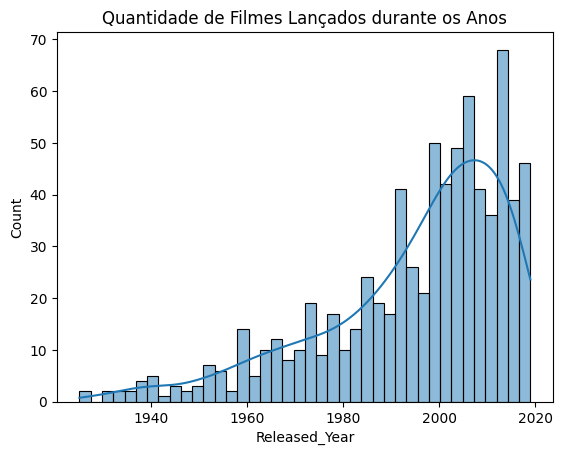

In [24]:
sns.histplot(data=df, x=df['Released_Year'], kde=True, bins=40)
plt.title('Quantidade de Filmes Lançados durante os Anos')
plt.show()

- A quantidade de filmes lançados vem aumentando gradualmente até aproximadamente 2015/2016.
- 2015/2016 nota-se que há uma diminuição nos lançamentos de filmes novos.
- Em 2020 há uma queda acentuada de produções lançadas, possivelmente relacionada ao COVID-19 e a consequente quarentena resultando na paralisição em todas as indústrias. Como estamos presenciando nesses últimos tempos, aos poucos nos recuperando da pandemia, houve aumento da quantidade de filmes lançados, e portanto a tendência é que volte a aumentar novamente. 

##### Correlação das colunas com a coluna "Gross"

In [25]:
correlacao = df.corr(numeric_only=True)
print(correlacao['Gross'].sort_values(ascending=False))

Gross            1.000000
No_of_Votes      0.570802
Released_Year    0.234097
Runtime          0.172355
IMDB_Rating      0.132415
Meta_score      -0.029066
Name: Gross, dtype: float64


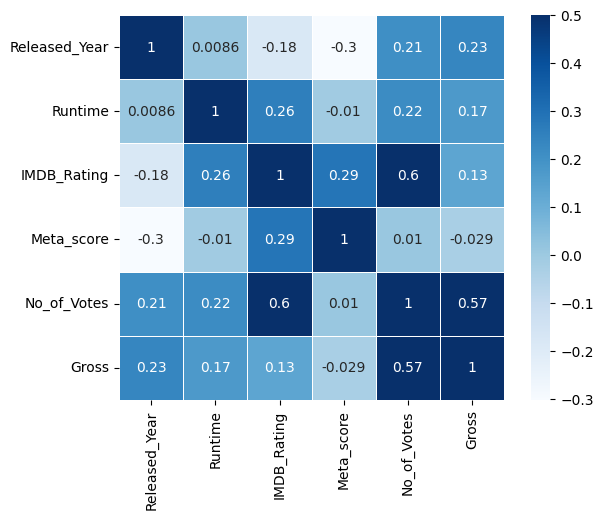

In [26]:
plt.figure(figsize=(7,5))
sns.heatmap(correlacao, square=True, vmax=0.5, cmap='Blues', linewidth=.5, annot=True);

##### Os principais fatores ligados ao faturamento(Gross) são:
1. Número de votos (`No_of_Votes`) com 56,09%.
2. Ano de lançamento (`Released_Year`) com 23,44%.

- Vamos analizar o ano de lançamento. Como comentado antes, o **número de votos será desconsiderado para esta pergunta**.

#### Relação **`Gross`** x **`Released_Year`**

In [27]:
df_auge = df.loc[:, ['Released_Year', 'Gross']].groupby('Released_Year').sum().sort_values(by='Gross', ascending=False)
display(df_auge.head(7))

,Gross
Released_Year,
2009,2.937160e+09
2014,2.744112e+09
2018,2.602197e+09
2016,2.580142e+09
2012,2.535973e+09
2010,2.490208e+09
2015,2.446339e+09


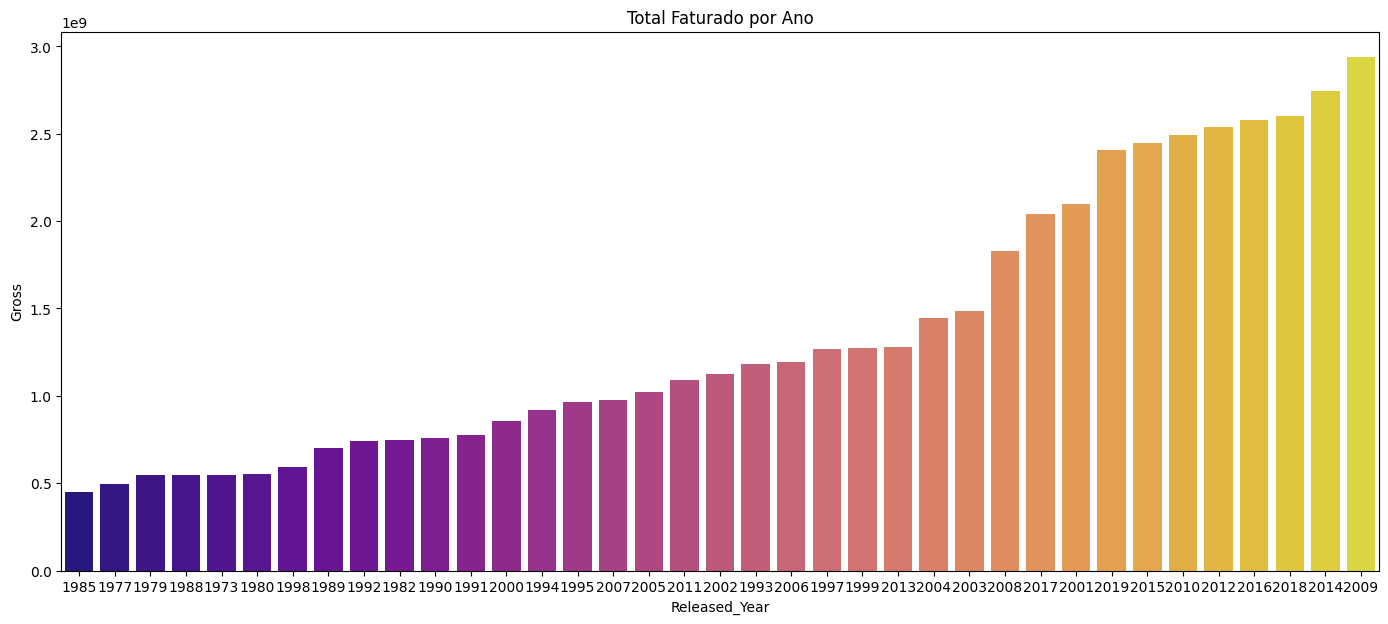

In [28]:
plt.figure(figsize=(17, 7))
sns.barplot(data=df_auge, x="Released_Year", y='Gross', palette='plasma', errorbar=None, 
                order=df_auge.groupby('Released_Year')['Gross'].agg('sum').sort_values(ascending=True).index[50:])
plt.title('Total Faturado por Ano')
plt.show()

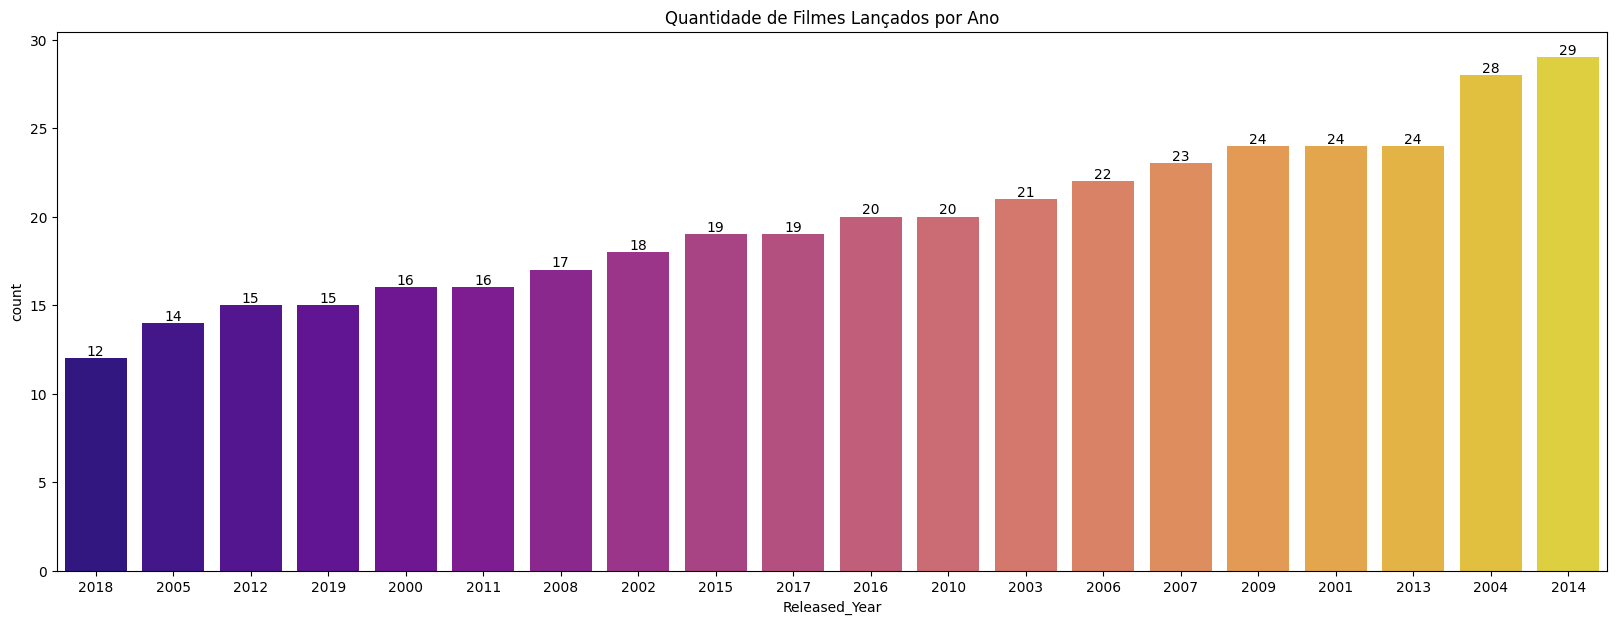

In [29]:
filmes_1980 = df.loc[df['Released_Year']>=2000, :]
plt.figure(figsize=(20, 7))
x = sns.countplot(x='Released_Year', data=filmes_1980, palette='plasma', order=filmes_1980['Released_Year'].value_counts(ascending=True).index)
for container in x.containers:
    x.bar_label(container)
plt.title('Quantidade de Filmes Lançados por Ano')
plt.show()

In [30]:
print(f"2009: {df.loc[df['Released_Year']==2009, 'Gross'].sum()/23}")
print(f"2014: {df.loc[df['Released_Year']==2014, 'Gross'].sum()/28}")
print(f"2018: {df.loc[df['Released_Year']==2018, 'Gross'].sum()/12}")

2009: 127702592.0
2014: 98003984.0
2018: 216849792.0


##### Anotações:
Ranking por Faturamento:
      2009--> 2014--> 2018--> 2016

      
Ranking por Quantidade Lançamento:
      2014--> 2004--> 2001--> 2009

#### Conclusão:
- O ano de 2014 foi o segundo no ranking de faturamento, mas também foi um ano com muitos lançamentos, totalizando 28. Já 2018, ficou em terceiro em faturamento, mas ao contrário de 2014, foram lançados somente 12 filmes. Portanto, o ano não é o fator determinante, não é porquê um filme foi lançado em 2018 que vai ter um bom faturamento, mas o filme em si. A questão não é quando, mas qual. Qual é o filme que será lançado.
- Pelos gráficos acima podemos ver que o ano não está relacionado com a alta expectativa de faturamento de um filme. Vamos pegar de exemplo o ano de 2014 e 2018 para entendermos melhor.
- E é neste momento que analizaremos outras possíveis razões e fatores relacionados à alta expectativa de faturamento de um filme :)  


#### Relação **`Diretor`** x **`Faturamento`**
- Veremos se o diretor do filme impacta no faturamento de um filme
##### Top 10 Diretores que mais faturaram juntando todas as suas obras

In [31]:
df_diretor_gross = df.loc[:, ['Director', 'Gross']].groupby('Director').sum().sort_values(by='Gross', ascending=False)
df_diretor_gross.head(10)

,Gross
Director,
Steven Spielberg,2.478133e+09
Anthony Russo,2.205039e+09
Christopher Nolan,1.937454e+09
James Cameron,1.748237e+09
Peter Jackson,1.597313e+09
J.J. Abrams,1.423171e+09
Brad Bird,1.099628e+09
Robert Zemeckis,1.049446e+09
David Yates,9.789537e+08


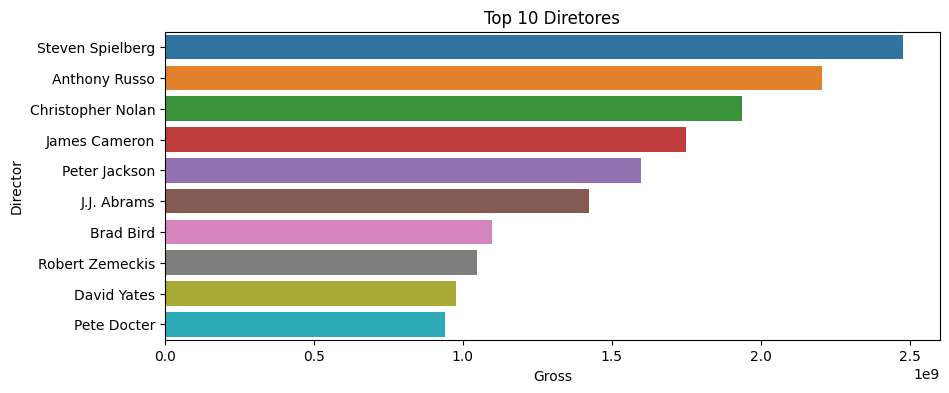

In [32]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df_diretor_gross, x="Gross", y='Director', palette='tab10', errorbar=None, 
                order=df_diretor_gross.groupby('Director')['Gross'].agg('sum').sort_values(ascending=False).index[:10])

plt.title('Top 10 Diretores')
plt.show()

##### Top 10 Diretores dos Filmes que mais Faturaram
- Vamos agora comparar os diretores dos top 10 filmes rankeados por seu faturamento.

In [33]:
df_filme_diretor = df.loc[:, ['Series_Title', 'Director', 'Gross']].sort_values(by='Gross', ascending=False).reset_index()
df_filme_diretor.drop('index', axis=1, inplace=True)
df_filme_diretor.head(10)

,Series_Title,Director,Gross
0,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,936662208.0
1,Avengers: Endgame,Anthony Russo,858372992.0
2,Avatar,James Cameron,760507648.0
3,Avengers: Infinity War,Anthony Russo,678815488.0
4,Titanic,James Cameron,659325376.0
5,The Avengers,Joss Whedon,623279552.0
6,Incredibles 2,Brad Bird,608581760.0
7,The Dark Knight,Christopher Nolan,534858432.0
8,Rogue One,Gareth Edwards,532177312.0
9,The Dark Knight Rises,Christopher Nolan,448139104.0


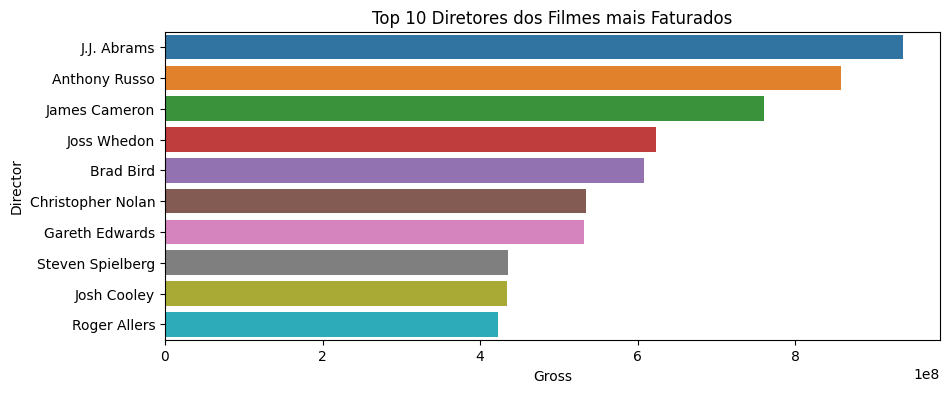

In [34]:
df_filme_diretor = df.loc[:, ['Series_Title', 'Director', 'Gross']].sort_values(by='Gross', ascending=False).head(13)
df_filme_diretor.drop_duplicates(subset='Director', inplace=True)
plt.figure(figsize=(10, 4))
sns.barplot(data=df_filme_diretor.sort_values(by='Gross', ascending=False), x="Gross", y='Director', palette='tab10', errorbar=None)

plt.title('Top 10 Diretores dos Filmes mais Faturados')
plt.show()

- **`Extra`**: Lista de todos os Diretores que os gêneros mais marcantes de suas obras:

In [35]:
df_diretor_genre = df.loc[:, ['Director', 'Genre', 'Gross']].groupby('Director').sum().sort_values(by='Gross', ascending=False)

mode_genre_director = df_diretor_genre.pivot_table(values=['Genre'], columns='Director', aggfunc=(lambda x: x.mode()[0]))
mode_genre_director

Director,Abdellatif Kechiche,Abhishek Kapoor,Adam McKay,Akira Kurosawa,Alan J. Pakula,Alan Parker,Alejandro Amenábar,Alejandro G. Iñárritu,Alejandro Jodorowsky,Alex Garland,Alex Proyas,Alexander Payne,Alfonso Cuarón,Alfonso Gomez-Rejon,Alfred Hitchcock,Anders Thomas Jensen,Andrew Adamson,Andrew Davis,Andrew Lau,Andrew Niccol,Andrew Stanton,Andrey Zvyagintsev,Aneesh Chaganty,Ang Lee,Anthony Russo,Antoine Fuqua,Anton Corbijn,Asghar Farhadi,Ashutosh Gowariker,Barry Levinson,Ben Affleck,Bennett Miller,Bernardo Bertolucci,Billy Bob Thornton,Billy Wilder,Boaz Yakin,Bob Clark,Bob Fosse,Bob Persichetti,Bong Joon Ho,Brad Anderson,Brad Bird,Bradley Cooper,Brian De Palma,Brian G. Hutton,Brian Henson,Bruce Robinson,Bryan Singer,Byron Howard,Cameron Crowe,Carol Reed,Cary Joji Fukunaga,Chan-wook Park,Charles Chaplin,Charles Laughton,Charlie Kaufman,Chris Columbus,Christian Carion,Christophe Barratier,Christopher McQuarrie,Christopher Miller,Christopher Nolan,Clint Eastwood,Cristian Mungiu,Curtis Hanson,Céline Sciamma,Damien Chazelle,Damián Szifron,Dan Gilroy,Danis Tanovic,Danny Boyle,Darren Aronofsky,David Ayer,David Cronenberg,David Fincher,David Lean,David Leitch,David Lynch,David Mackenzie,David Mickey Evans,David O. Russell,David Yates,David Zucker,Dean DeBlois,Denis Villeneuve,Deniz Gamze Ergüven,Destin Daniel Cretton,Don Hall,Don Siegel,Dorota Kobiela,Doug Liman,Duncan Jones,Edgar Wright,Edward Zwick,Elia Kazan,Emir Kusturica,Eric Bress,Ernst Lubitsch,Ethan Coen,F. Gary Gray,Fabián Bielinsky,Fatih Akin,Federico Fellini,Felix van Groeningen,Fernando Meirelles,Florian Henckel von Donnersmarck,Francis Ford Coppola,Francis Lee,Francis Veber,Frank Capra,Frank Darabont,Frank Miller,Franklin J. Schaffner,Fred Zinnemann,Fritz Lang,Gabriele Muccino,Gareth Edwards,Gareth Evans,Garth Davis,Gary Trousdale,Gavin O'Connor,Gene Saks,George A. Romero,George Cukor,George Lucas,George Miller,George P. Cosmatos,George Roy Hill,George Seaton,Georges Franju,Gillo Pontecorvo,Giuseppe Tornatore,Gore Verbinski,Gregg Araki,Gregory Hoblit,Greta Gerwig,Guillermo del Toro,Gus Van Sant,Guy Hamilton,Guy Ritchie,Hal Ashby,Hannes Holm,Harold Ramis,Hayao Miyazaki,Henry Selick,Hirokazu Koreeda,Hiromasa Yonebayashi,Howard Hawks,Ingmar Bergman,Irvin Kershner,Isao Takahata,Ivan Reitman,J.J. Abrams,Jack Clayton,Jaco Van Dormael,Jacques Audiard,James Algar,James Cameron,James Foley,James Frawley,James Gunn,James Ivory,James L. Brooks,James Mangold,James Marsh,James McTeigue,James Simone,James Wan,James Whale,Je-kyu Kang,Jean-Jacques Annaud,Jean-Marc Vallée,Jean-Pierre Jeunet,Jee-woon Kim,Jemaine Clement,Jessie Nelson,Jim Abrahams,Jim Jarmusch,Jim Sheridan,Joe Johnston,Joe Wright,Joel Coen,Joel Schumacher,John Boorman,John Cameron Mitchell,John Carney,John Carpenter,John Ford,John G. Avildsen,John Hughes,John Huston,John Landis,John Lasseter,John Lee Hancock,John McTiernan,John Schlesinger,John Singleton,John Sturges,Jon Avnet,Jon Favreau,Jonathan Dayton,Jonathan Demme,Jonathan Levine,Jonathan Lynn,Jordan Peele,Joseph Kosinski,Joseph L. Mankiewicz,Josh Boone,Josh Cooley,Joss Whedon,José Padilha,Juan José Campanella,Jules Dassin,Julian Schnabel,Kar-Wai Wong,Karan Johar,Ken Annakin,Ken Loach,Kenneth Lonergan,Kevin Costner,Kevin Macdonald,Kevin Reynolds,Kevin Smith,Ki-duk Kim,Krzysztof Kieslowski,Lana Wachowski,Lars von Trier,Lasse Hallström,Lee Tamahori,Lee Unkrich,Lenny Abrahamson,Lewis Milestone,Louis Malle,Luc Besson,Luca Guadagnino,Luis Buñuel,Lukas Moodysson,M. Night Shyamalan,Majid Majidi,Makoto Shinkai,Mamoru Oshii,Marc Caro,Marc Forster,Marc Webb,Mark Herman,Mark Osborne,Mark Rydell,Martin Brest,Martin Campbell,Martin McDonagh,Martin Scorsese,Martin Zandvliet,Mary Harron,Matt Reeves,Matt Ross,Matthew Vaughn,Mel Brooks,Mel Gibson,Mel Stuart,Merian C. Cooper,Michael Cimino,Michael Curtiz,Michael Haneke,Michael Mann,Michael Radford,Michel Gondry,Michel Hazanavicius,Mikael Håfström,Mike Judge,Mike Leigh,Mike Newell,Mike Nichols,Milos Forman,Morten Tyldum,Nadine Labaki,Nat

#### Conclusão:
- Primeiro, fiz um ranking dos top10 diretores de acordo com o total faturado juntando todas as suas obras feitas. 
- Segundo, fiz outro ranking dos top10 diretores, mas agora de acordo com o top 10 Filmes mais faturados.
- Pudemos observar que, os diretores mais bem sucedidos, aqueles que estão dentre os top10 Diretores, também são vistos no Ranking dos filmes que mais faturaram. 
- Sendo assim, observa-se que o Diretor é um dos fatores que estão relacionados com alta expectativa de faturamento de um filme. Exemplo do filme Avengers de Anthony Russo. Anthony Russo está em 2º lugar no TOP 10 Diretores, mas também o seu filme ficou em 2º e 4º nos filmes mais faturados.
- Portanto, o diretor do filme, também é um fator relacionado com a alta expectativa de um filme :)

#### Relação **`Gênero`** x **`Faturamento`**
- Agora vamos analisar se o gênero de um filme implica no seu faturamento.

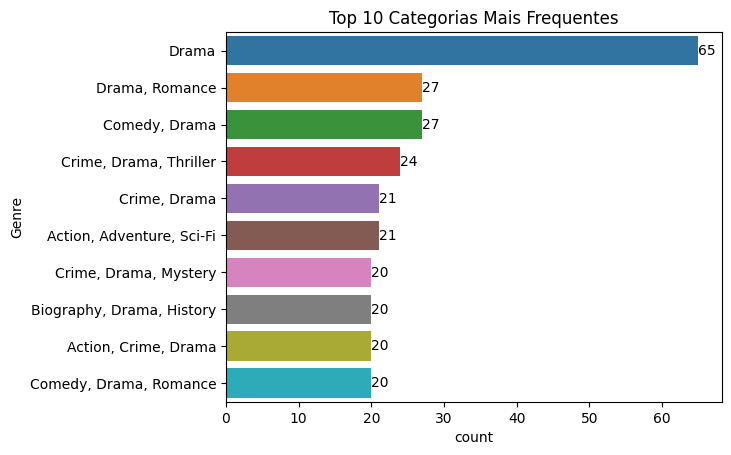

In [36]:
# Genêros mais predominantes
main_genero = pd.DataFrame(df['Genre'].value_counts().reset_index())

x = sns.barplot(main_genero.head(10), x="count", y="Genre", palette='tab10')
for container in x.containers:
    x.bar_label(container)
plt.title('Top 10 Categorias Mais Frequentes')
plt.show()

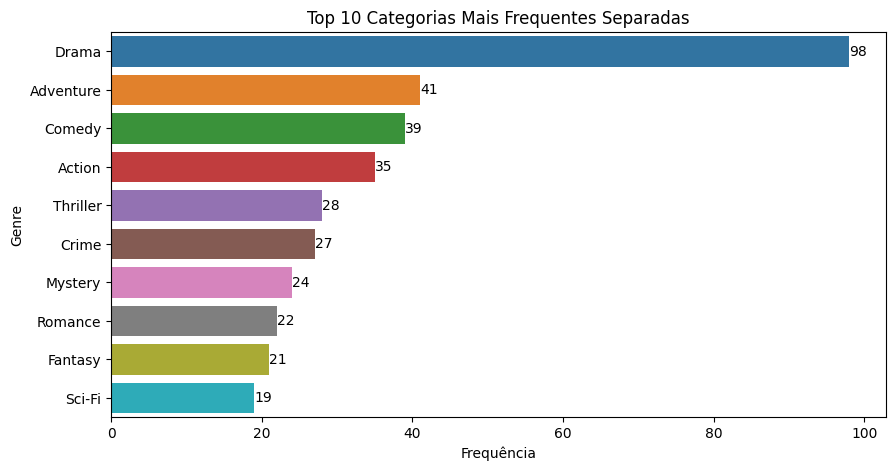

In [37]:
lista = []
for generos in main_genero['Genre']:
    for genero in generos.split(', '):
        lista.append(genero)

df_genre = pd.DataFrame({'Genre': lista})
df_genre = df_genre.groupby('Genre').size().reset_index(name='Frequência').sort_values(by='Frequência', ascending=False)

# Gráfico
plt.figure(figsize=(10, 5))
x = sns.barplot(x="Frequência", y='Genre', palette="tab10", errorbar=None, data=df_genre.head(10))
for container in x.containers:
    x.bar_label(container)
plt.title('Top 10 Categorias Mais Frequentes Separadas')
plt.show()

- Pelo visto o gênero drama aparece com mais frequência, mas será que é o gênero que mais está relacionado com o faturamento de um filme? 

##### Top 10 filmes que mais Faturaram

In [38]:
df_filme_genero = df[['Genre', 'Series_Title', 'Director', 'Gross']].sort_values(by='Gross', ascending=False).reset_index()
df_filme_genero.drop('index', axis=1, inplace=True)
df_filme_genero.head(10)

,Genre,Series_Title,Director,Gross
0,"Action, Adventure, Sci-Fi",Star Wars: Episode VII - The Force Awakens,J.J. Abrams,936662208.0
1,"Action, Adventure, Drama",Avengers: Endgame,Anthony Russo,858372992.0
2,"Action, Adventure, Fantasy",Avatar,James Cameron,760507648.0
3,"Action, Adventure, Sci-Fi",Avengers: Infinity War,Anthony Russo,678815488.0
4,"Drama, Romance",Titanic,James Cameron,659325376.0
5,"Action, Adventure, Sci-Fi",The Avengers,Joss Whedon,623279552.0
6,"Animation, Action, Adventure",Incredibles 2,Brad Bird,608581760.0
7,"Action, Crime, Drama",The Dark Knight,Christopher Nolan,534858432.0
8,"Action, Adventure, Sci-Fi",Rogue One,Gareth Edwards,532177312.0
9,"Action, Adventure",The Dark Knight Rises,Christopher Nolan,448139104.0


- Podemos observar que pelo ranking dos Filmes acima, a maioria concentra-se em ação e aventura, depois ficção científica e drama.

##### Ranking dos gêneros que mais faturaram

In [39]:
df_ranking_genre = df.loc[:, ['Genre', 'Gross']].groupby('Genre').sum().sort_values(by='Gross', ascending=False).reset_index()
df_ranking_genre.head(10)

,Genre,Gross
0,"Action, Adventure, Sci-Fi",5.898659e+09
1,"Animation, Adventure, Comedy",4.503337e+09
2,"Action, Adventure, Drama",2.668836e+09
3,"Action, Adventure, Fantasy",2.116341e+09
4,"Animation, Action, Adventure",2.008695e+09
5,Drama,1.981770e+09
6,"Drama, Romance",1.962227e+09
7,"Action, Adventure, Comedy",1.911202e+09
8,"Action, Crime, Drama",1.308134e+09
9,"Crime, Drama, Thriller",1.255884e+09


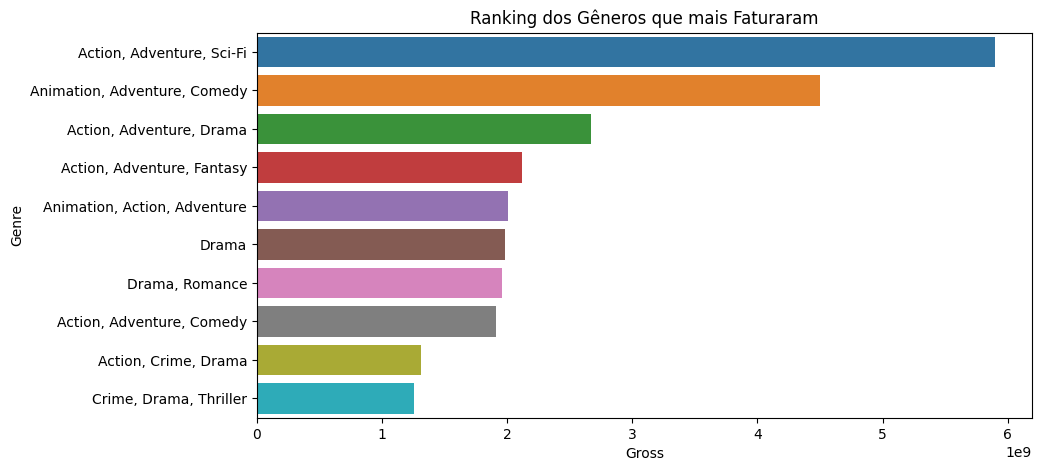

In [40]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Gross', y='Genre', palette ='tab10', data=df_ranking_genre.head(10))
plt.title('Ranking dos Gêneros que mais Faturaram')
plt.show()

#### Conclusão:
- Respondendo a pergunta anterior, embora Drama apareça com maior frequência, filmes que envolvem ação, aventura e ficção científica são os que mais faturaram, e como visto antes, esse tipo de gênero começou a se destacar dos anos 2000 em diante. Ou seja, o gênero de um filme está sim relacionado com a alta expectativa de faturamento de um filme.

#### Relação **`Atores`** x **`Faturamento`**
- Será que o elenco também está relacionado à alta expectativa de faturamento de um filme?

In [41]:
#Separando somente as colunas do título do filme, dos atores e do faturamento Gross.
df_ator_gross = df.sort_values(by='Gross', ascending=False)[['Series_Title', 'Star1', 'Star2', 'Star3', 'Star4', 'Gross']].reset_index()
df_ator_gross.drop('index', axis=1, inplace=True)
df_ator_gross.head(3)

,Series_Title,Star1,Star2,Star3,Star4,Gross
0,Star Wars: Episode VII - The Force Awakens,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,936662208.0
1,Avengers: Endgame,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,858372992.0
2,Avatar,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,760507648.0


In [42]:
# A minha ideia é juntar todos os atores em uma só coluna chamada "Elenco", para depois contar a frequência que cada ator aparece.
df_ator_gross["Elenco"] = df_ator_gross["Star1"].map(str) + ", " + df_ator_gross["Star2"] + ", " + df_ator_gross["Star3"] + ", " + df_ator_gross["Star4"]
display(df_ator_gross.head(3))

#Pegarei os top20 para podermos ver se os atores realmente impactam no faturamento de um filme :)
df_ator_gross = df_ator_gross.head(20)

,Series_Title,Star1,Star2,Star3,Star4,Gross,Elenco
0,Star Wars: Episode VII - The Force Awakens,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,936662208.0,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna..."
1,Avengers: Endgame,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,858372992.0,"Joe Russo, Robert Downey Jr., Chris Evans, Mar..."
2,Avatar,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,760507648.0,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."


##### Contando a frequência com que os atores apareceram nos top 20 filmes mais faturados

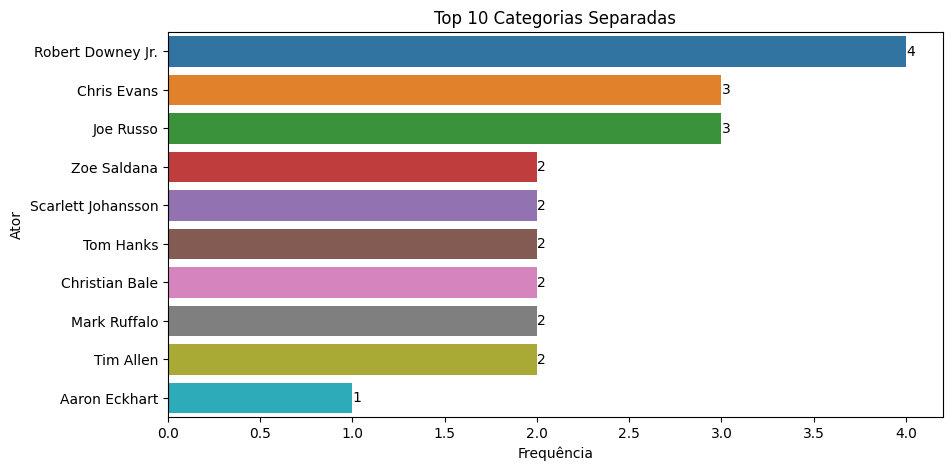

In [43]:
lista_atores = []
for atores in df_ator_gross["Elenco"]:
    for ator in atores.split(', '):
        lista_atores.append(ator)

df_atores = pd.DataFrame({'Ator': lista_atores})
df_atores = df_atores.groupby('Ator').size().reset_index(name='Frequência').sort_values(by='Frequência', ascending=False)

# Gráfico
plt.figure(figsize=(10, 5))
x = sns.barplot(x="Frequência", y='Ator', hue="Ator", errorbar=None, data=df_atores[:10])
for container in x.containers:
    x.bar_label(container)
plt.title('Top 10 Categorias Separadas')
plt.show()

#### Conclusão:
- Observando os atores no ranking acima, são atores extremamente conhecidos e atores mais frequentes em filmes de sucesso na bilheteria. Robert Downey Jr. nosso eterno Homem de Ferro, Chris Evans e Joe Russo participaram do filme "Avangers", e Zoe Saldana em Avatar e em Guardiões da Galáxia. Esses filmes fizeram muito sucesso, eu mesmo amo Avangers e Avatar!
- Filmes que possuem atores famosos e bem conhecidos são sim um fator relacionado com a alta expectativa de faturamento de um filme.

#### Relação **`Classificação`** x **`Faturamento`**
- Será que a Classificação Indicatva é um fator relacionado à alta expectativa de um filme?

In [44]:
df_class_gross = df.loc[:, ['Certificate', 'Gross']].groupby('Certificate').sum().sort_values(by='Gross', ascending=False)
df_class_gross

,Gross
Certificate,
UA,2.131363e+10
U,1.736411e+10
A,1.146725e+10
R,3.555792e+09
PG-13,1.436552e+09
G,4.984359e+08
PG,3.829412e+08
Passed,7.748418e+07
Approved,4.234808e+07


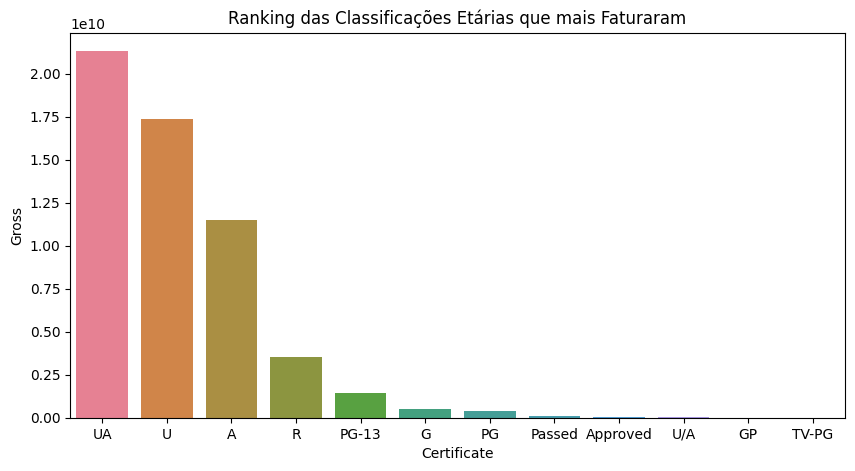

In [45]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Certificate', y='Gross', hue ='Certificate', data=df_class_gross)
plt.title('Ranking das Classificações Etárias que mais Faturaram')
plt.show()

- Abaixo está uma tabela com a moda do gênero que cada Classificação Etária mais se identifica:

In [46]:
mode_certificate = df.pivot_table(values=['Genre'], columns='Certificate', aggfunc=(lambda x: x.mode()[0]))
mode_certificate

Certificate,A,Approved,G,GP,PG,PG-13,Passed,R,TV-PG,U,U/A,UA
Genre,"Crime, Drama","Action, Adventure, Western","Comedy, Drama, Family","Adventure, Comedy, War","Animation, Action, Adventure",Drama,"Action, Drama, Western",Drama,"Drama, Mystery","Animation, Adventure, Comedy","Drama, Mystery, Thriller","Action, Adventure, Sci-Fi"


##### `Info`  TOP 3:
- `UA` (Parental Guidance): Filmes com classificação “UA” exigem a orientação dos pais para crianças menores de 12 anos. Eles podem conter violência moderada, temas adultos ou linguagem fortes.
- `U` (Universal): Filmes com classificação “U” são adequados para todas as idades. Eles não contêm conteúdo violento, sexual ou perturbador. Esses filmes são apropriados para crianças e adultos.
- `A` é restrita a adultos. Filmes com essa classificação podem conter cenas de violência intensa, conteúdo sexual explícito ou temas perturbadores. Eles são destinados apenas a espectadores maiores de 18 anos.


#### Conclusão: 
- A faixa indicativa pode ser sim um fator ligado à expectativa de faturamento, já que está relacionada com o gênero. Exemplo do "UA", top1 no ranking de classificação etária. Vemos que pelo Ranking dos gêneros que mais faturaram foram filmes com mais ação, aventura e ficção científica, e a faixa indicativa para esse tipo de filme é "UA".

##### Sendo assim, os principais fatores que estão relacionados com a alta expectativa de faturamento de um filme são:
  - Diretor do filme;
  - Elenco presente no filme;
  - Gênero do filme;
  - Classificação indicativa, porque acompanha o gênero do filme.

#### 3. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?
##### Perguntas/suposições:
- Ordenando os filmes de acordo com a nota_IMDB e No_of_Votes, e Metascore, do de maior nota para menor nota, quais são as palavras que mais se repetem nas sinopses?

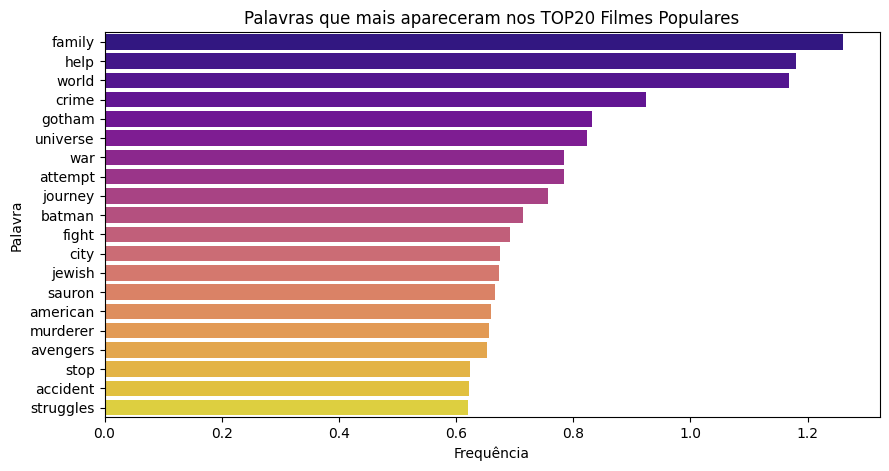

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
#df_2010 = df.loc[df['Released_Year']>=2010, :]
#df_popular = df_popular.head(50)
df_atuais_popular = df_atuais_popular.head(50)
# Definir stop words adicionais
additional_stop_words = ['young', 'life', 'man', 'woman', 'word', 'year', 'years', 'old', 'new', 'girl', 'boy', 'father', 'mother', 'time', 'finds', 
                         'story', 'son', 'day', 'true', 'daughter', 'wife', 'based', 'child','days']

# Combinar as stop words padrão com as adicionais
stop_words = list(text.ENGLISH_STOP_WORDS.union(additional_stop_words))

# Instanciar o TfidfVectorizer com as stop words combinadas
tfidf = TfidfVectorizer(stop_words=stop_words)

# Ajustar e transformar a coluna Overview
tfidf_matrix = tfidf.fit_transform(df_atuais_popular['Overview'])

# Obter o nome das palavras (features)
words = tfidf.get_feature_names_out()

# Converter a matriz TF-IDF em um DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=words)

# Opcional: Somar as frequências das palavras em todos os documentos
word_frequencies = tfidf_df.sum(axis=0).sort_values(ascending=False)
df_frequencia_palavra = pd.DataFrame(word_frequencies).reset_index()
df_frequencia_palavra.columns = ['Palavra', 'Frequência']

plt.figure(figsize=(10, 5))
sns.barplot(data=df_frequencia_palavra.head(20), x='Frequência', y='Palavra', palette='plasma')
plt.title('Palavras que mais apareceram nos TOP20 Filmes Populares')
plt.show()

##### O que isso significa?
- Filmes em que na sinopse apresentam palavras que remetem ao gênero de ação, crime, e aventura, têm melhor aprovação do público.
- A sinopse também pode também estar relacionado a alta expectativa de faturamento de um filme, uma vez que sinopses que apresentam palavras que remetem ação e aventura, chamam a atenção do público. 

#### Prevendo o gênero de um filme a partir da coluna Overview
- Vamos fazer um `mini modelo de previsão` para prever o gênero de um filme com a sua sinopse. O problema é que teremos que prever com base em valores categóricos, de texto. Por isso vamos utilizar o `TfidfVectorizer()`.
  
    - O TfidfVectorizer(), Term Frequency-Inverse Document Frequency, é uma ferramenta da biblioteca do scikit-learn, que transforma um conjunto de documentos de texto em uma matriz de recursos TF-IDF. É uma medida de quão comum ou raro um termo é em todo os documentos. Representa o texto considerando a importância de cada palavra no conjunto de dados.
    - Além disso, uma de suas vantagens é, que o TfidfVectorizer() tem um parâmetro chamado stop_words, ele permite que palavras comuns, no nosso caso em inglês ("the", "and", "in", etc.), devem ser removidas e desconsideradas. E portanto, vamos utilizá-lo no nosso modelo de previsão.
  

In [48]:
# Lista de sinopses para usarmos no nosso modelo
lista_sinopses = df['Overview'].head(15)
for sinopse in lista_sinopses:
    print(sinopse)

An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.
When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.
The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.
A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.
Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.
The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.
In German-occupied Poland during World War II, industrialist Oskar Schindler gradually becomes concerned for his Jewish workforce

##### Construindo o mini modelo de previsão de Gênero

In [49]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
#df = df.loc[df['Genre']!='Drama']

# Transformando todas as palavras em minúsculo.
df['Overview'] = df['Overview'].str.lower()

# Vetorização
vectorizer = TfidfVectorizer(stop_words='english') #Isso especifica que as palavras comuns em inglês ("the", "and", "in", etc.) devem ser removidas antes da análise.
X = vectorizer.fit_transform(df['Overview'])

# Separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, df['Genre'], test_size=0.2, random_state=42)

# Treinar o modelo --> Usar o Grid Search para escolher os melhores parâmetros.
model = MultinomialNB()
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_

# Fazer previsões
y_pred = best_model.predict(X_test)

# Avaliar o modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
#print(classification_report(y_test, y_pred))

# Usar o modelo para prever o gênero de novas sinopses
new_description = ["Lion prince Simba and his father are targeted by his bitter uncle, who wants to ascend the throne himself."]
new_description_transformed = vectorizer.transform(new_description)
predicted_genre = best_model.predict(new_description_transformed)
print(predicted_genre)

Accuracy: 0.12666666666666668
['Animation, Adventure, Drama']


### Iniciando Processo para a Construção de um Modelo de Previsão
#### 3. Explique como você faria a previsão da nota do imdb a partir dos dados.
##### Passos:
1. Analisar as colunas categóricas e outliers;
1. Transformar os dados categóricos em numéricos com One Hot Enconder ou/e Label Encoder;
3. Normalizar ou Padronizar os dados;
4. Separar em dados de treino e de teste;
5. Escolher um modelo de previsão;
6. Salvar modelo e a normalização/padronização;
7. Aplicar no novo conjunto de dados;
##### **1. Quais variáveis e/ou suas transformações você utilizou e por quê?**
- Primeiro analisamos as colunas numéricas e as colunas categóricas(texto). Retiramos a coluna **"Series_Title"**, já que todos os seus valores eram únicos, não seria favorável para um modelo de previsão. Então, padronizamos as colunas numéricas com o `StandardScaler`. Já nas colunas categóricas, **"Genre"**, **"Director"**, e **"Certificate"**, utilizamos o `One Hot Encoder` para tranformar os seus dados. Ao analisarmos a coluna **"Certificate"**, abservamos que `algumas variáveis que estavam separadas significavam a mesma coisa`, então fomos juntando as colunas em uma só. Na coluna **"Gross"**, possuía valores bem extremos, o mínimo com 1305.0 e o máximo com 936662208.0! Além de desvio padrão de 112207424.0! Então, filtramos para pegar apenas uma parte dessa coluna. Mais para frente ficará mais claro.
    
- Nas colunas de elenco(**"Star1", "Star2", "Star3", e "Star4"**) utilizamos o `Label Encoder`, já que são muitos atrizes/atores, aplicar o One Hot Encoder sobrecarregaria no número de colunas. Entretanto, há um pequeno problema. Há `atores que aparecem na coluna Star1 e que depois, em outro filme`, aparecem em Star2, ou Star3 ou Star4. Para não cometermos o erro de atribuir números diferentes para um mesmo ator/atriz, `concatenamos essas quatro colunas de atores em uma única lista contendo apenas valores únicos`, sem atores repetidos. Para depois então, aplicarmos o Label Encoder em cada coluna. Assim, cada ator/atriz receberá um número e não importará em que coluna estiver, o seu número não mudará.
    
- Agora, transformar a coluna de **"Overview"**(descrição) foi um pouco mais complicada. Já que é um conjunto de palavras e texto, tivemos que fazer um tratamento diferenciado, por isso utilizamos o `TfidfVectorizer()`. Como já explicado anteriormente, ele é um recurso do scikit-learn que trata da frequência e o quão raro uma palavra é. Além de possuir um parâmetro, `stop_words`, que permite desconsiderar palavras comuns com "at", "the", "is"...
   
##### **2. Qual tipo de problema estamos resolvendo (regressão, classificação)?**

- Estamos resolvendo um problema de **regressão**. De acordo com pesquisa feita: "Os algoritmos de regressão procuram prever uma quantidade contínua(valores numéricos) e os algoritmos de classificação procuram prever um rótulo de classe(valores categóricos)".
    
- Ou seja, modelos de `classificação` são usados para prever valores categóricos se uma pessoa possui determinada doença ou não, é cachorro ou gato, ou no caso acima, para prever o gênero a partir da coluna "Overview", no qual utilizamos um modelo de classificação MultinomialNB(). Já os modelos de `regressão` são usado comumente para prever dados numéricos, como por exemplo, prever o preço de um imóvel, estimar preço de um determinado produto, ou no nosso caso, prever a nota de um filme com base nos dados fornecidos.
   
##### **3. Qual modelo melhor se aproxima dos dados e quais seus prós e contras?**

O modelo que mais se aproximou dos dados foi o **XGBoost**. O XGBoost é altamente otimizado para processamento paralelo, tornando-o mais rápido do que implementações tradicionais de gradient boosting. O XGBoost é uma extensão do gradient boosting, que combina vários "aprendizes fracos" (geralmente árvores de decisão) para criar um modelo de conjunto forte. Ele inclui termos de regularização na função de perda, evitando o overfitting e melhorando a generalização. Contras: O desempenho do XGBoost é influenciado pelos hiperparâmetros. Se o conjunto de dados for pequeno, o XGBoost pode ser propenso a overfitting. 


##### **4. Qual medida de performance do modelo foi escolhida e por quê?**
Performace do XGBoost + parâmetros:
```    
MAE: 0.12779762635537245
RMSE: 0.15810078205519576
Treino 0.8894829173795158
Previsão: 68.32663761220061
```

Em comparação aos outros modelos, o XGBoost teve menor dirença entre os dados de treino e os de previsão. Apesar de alguns como o RandomForest e o GradientBoosting possuírem acurácia de 90% aproximadamente, a previsão ficava em torno de 50%-60%, um gap de 30%-40% aproximadamente. Agora, apesar de no XGBoost a acurácia de treino ser 80% mais ou menos, a previsão fica em torno de 60%, um gap menor de 20 aproximadamente. O overfitting é maior nos dois modelos anteriores se comparado ao XGBoost.

### Quais são as colunas Categóricas e Numéricas que temos?

In [50]:
categoricos = df.select_dtypes(include=['object']).columns.tolist()
numericos = df.select_dtypes(include=['int', 'float']).columns.tolist()

print(f"Colunas categóricas:\n{categoricos}")
print(30*'-')
print(f"Colunas numéricas:\n{numericos}")

Colunas categóricas:
['Series_Title', 'Certificate', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
------------------------------
Colunas numéricas:
['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']


#### Coluna **`Certificate`**
- Vamos juntar algumas classificações, já que algumas são bem similares entre si ou até mesmo possuem o mesmo significado.

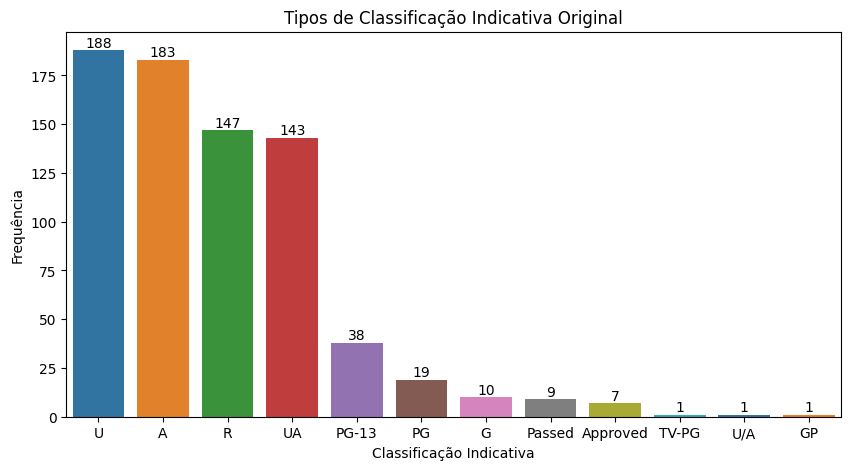

In [51]:
tipos_certificate = df['Certificate'].value_counts()
df_certificate = pd.DataFrame(tipos_certificate).reset_index()
df_certificate.columns = ['Classificação Indicativa', 'Frequência']

plt.figure(figsize=(10, 5))
x = sns.barplot(data=df_certificate, x='Classificação Indicativa', y='Frequência', palette='tab10')
for container in x.containers:
    x.bar_label(container)
plt.title('Tipos de Classificação Indicativa Original')
plt.show()

**1. `Passed e Approved`**: Vamos juntar as colunas Passed e Approved.

**2. `U e G`**:  Ambos possuem classificação livre: U(Universal) e G(Geral), nos EUA se usa o Geral, e na Índia o Universal.

**3. `Todos que possuem PG menos o PG-13 no nome + GP`**: PG significa Parental Guidance. A classificação indicativa GP ("General Public") foi usada brevemente nos EUA pelo Motion Picture Association od America (MPAA) entre 1970 e 1972. Indicava que o filme era adequado para o público em geral, mas que os pais eram avisados de que o conteúdo poderia não ser apropriado para crianças pequenas. Em 1972 então, a classificação GP foi substituída pela PG. Não vou incluir o PG-13 aqui, porque o PG-13 significa "pais fotermente cautelosos", conteúdo considerado impróprio para menores de 13 anos.
    
**4. `UA e U/A`**: UA é a nomenclatura para Universal e Adult respectivamente. Ambas são empregadas pelo Central Board Film Certification(CBFC) na Índia para indicar que o filme é adequado para o público em geral, mas como a nomenclatura também indica Adult, menores de 12 anos precisam de acompanhamento dos pais.

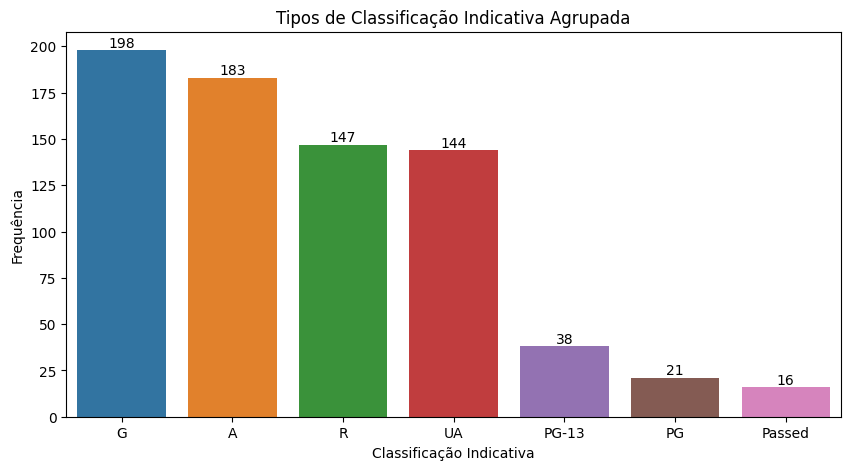

In [52]:
# Colunas com PG no nome
colunas_pg = []
for tipo in tipos_certificate.index:
    if 'PG' in tipo:
        colunas_pg.append(tipo)
    if tipo == 'GP':
        colunas_pg.append(tipo) 
colunas_pg.remove('PG-13')
        
for pg in colunas_pg:
    df.loc[df['Certificate']==pg, 'Certificate']='PG'
#print(df['Certificate'].value_counts())

# Colunas Passed e Approved
colunas_passed_approved = ['Passed', 'Approved']
for col in colunas_passed_approved:
    df.loc[df['Certificate']==col, 'Certificate']='Passed'
#print(df['Certificate'].value_counts())

# Colunas U e G
colunas_ug = ['U', 'G']
for ug in colunas_ug:
    df.loc[df['Certificate']==ug, 'Certificate']='G'
#print(df['Certificate'].value_counts())

# Colunas UA e U/A
colunas_ua = ['UA', 'U/A']
for ua in colunas_ua:
    df.loc[df['Certificate']==ua, 'Certificate']='UA'
#print(df['Certificate'].value_counts())

df_certificate_agrupado = df['Certificate'].value_counts()
df_certificate_agrupado = pd.DataFrame(df_certificate_agrupado).reset_index()
df_certificate_agrupado.columns = ['Classificação Indicativa', 'Frequência']

plt.figure(figsize=(10, 5))
x = sns.barplot(data=df_certificate_agrupado, x='Classificação Indicativa', y='Frequência', palette='tab10')
for container in x.containers:
    x.bar_label(container)
plt.title('Tipos de Classificação Indicativa Agrupada')
plt.show()

#### Coluna **`Elenco/Atores`**
- Vamos utilizar o `Label Encoder` no elenco. Como há muitos atores e atrizes, não vamos utilizar o One Hot Encoder. One Hot Encoder pode sobrecarregar na quantidade de colunas.

In [53]:
# Concatenar todas as colunas de atores em uma única lista
todos_atores = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']]).unique()

# Criar um único LabelEncoder para todos os atores
label_encoder = LabelEncoder()
label_encoder.fit(todos_atores)
# Aplicar o Label Encoding em cada coluna de atores
for col in ['Star1', 'Star2', 'Star3', 'Star4']:
    df[col] = label_encoder.transform(df[col])

# Mostrar o DataFrame com o Label Encoding aplicado

### Analisando os Outliers

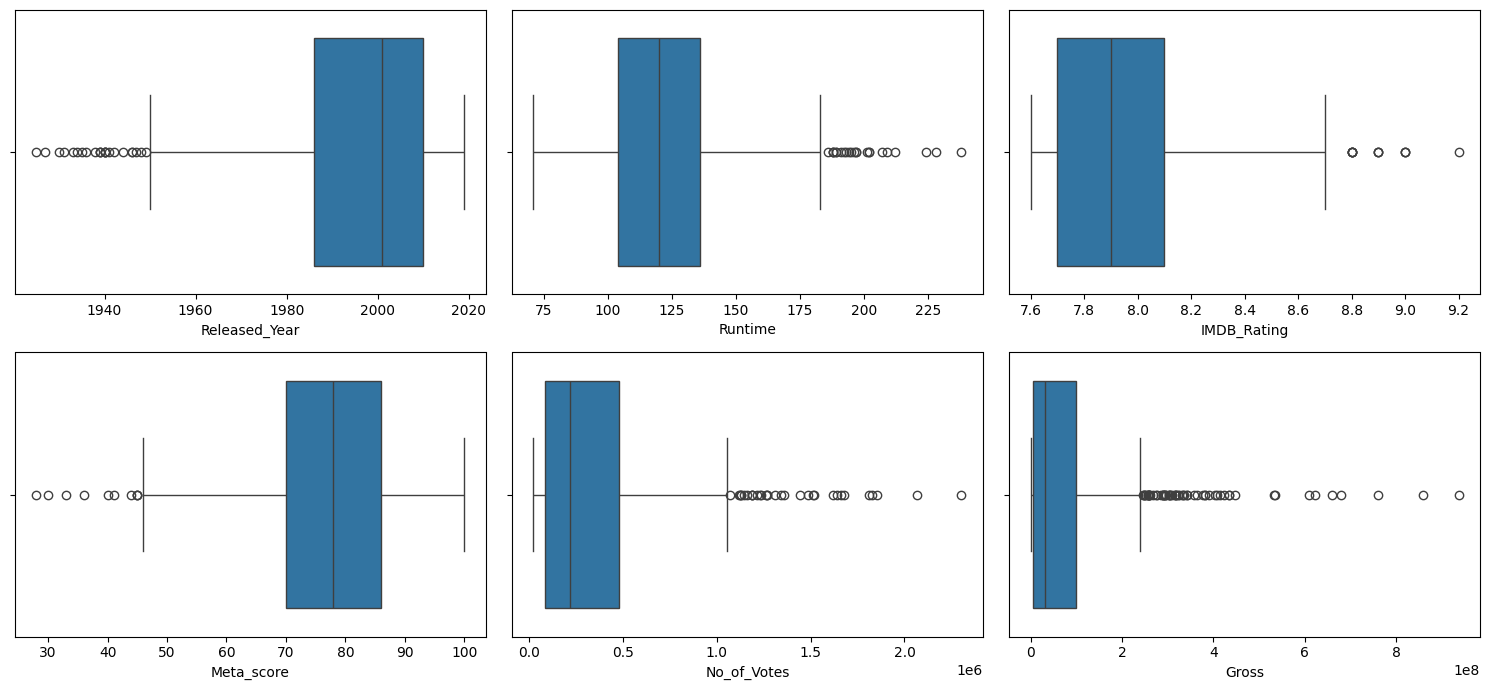

In [54]:
colunas_numericas = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, coluna in enumerate(colunas_numericas):
    ax = fig.add_subplot(2, 3, num+1)
    ax = sns.boxplot(x=df[coluna])
plt.tight_layout()
plt.show()

##### Observações:
- Vendo aqui, vamos tirar os outliers da coluna `Runtime`. Temos filmes com mais de 225 minutos!
- E vamos analisar a coluna `Gross`, talvez teremos que tirar ou filtrar os dados. Ela possui uma quantidade significativa de outliers...
- Os outros não vejo necessidade de retirar, afinal, também queremos evitar o overfitting de dados.

#### Definindo função para remoção de outliers e para criação de gráficos

In [55]:
# Outliers
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5*amplitude, q3 + 1.5*amplitude

def excluir_outliers(df, nome_coluna): # quero excluir os outliers
    qntd_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna]) # == base_airbnb['price']
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qntd_linhas - df.shape[0]
    return df, linhas_removidas

# Gráficos: diagrama de caixa e histograma
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2) #uma linha, duas colunas
    fig.set_size_inches(13, 3)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=coluna, kde=True)

#### Coluna **`Runtime`**
- Vamos então retirar os outliers da coluna Runtime. Possui filmes com mais de 225 minutos que não serão necessários e nem favoráveis ao nosso modelo de previsão :)

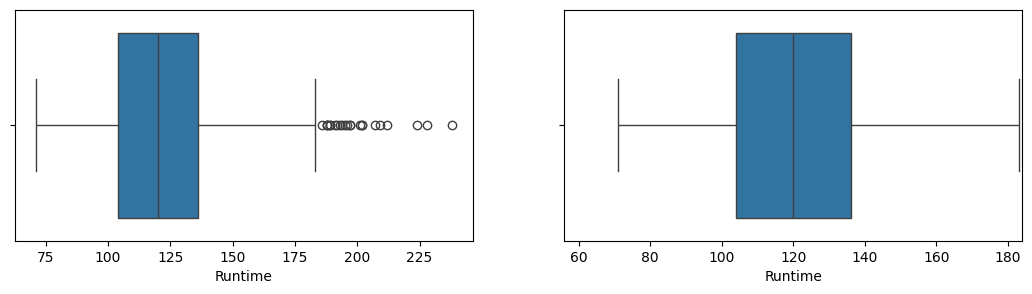

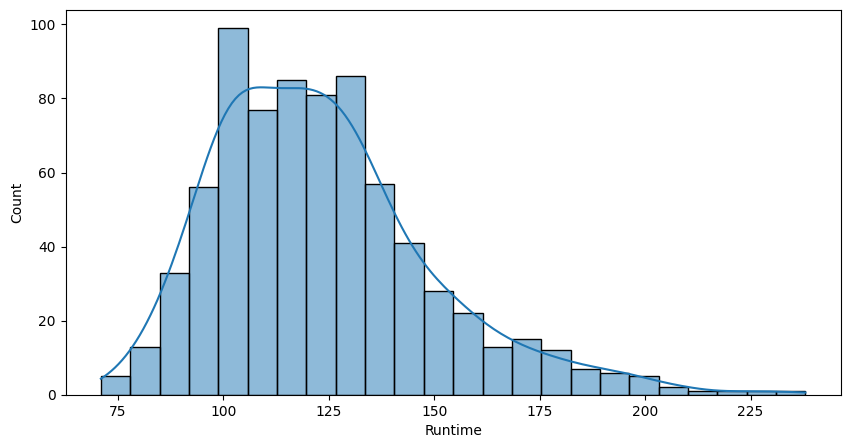

In [56]:
diagrama_caixa(df['Runtime'])
histograma(df['Runtime'])

In [57]:
print(df.shape)
df, linhas_removidas = excluir_outliers(df, 'Runtime')

print('{} linhas excluídas.'.format(linhas_removidas))
print(df.shape)

(747, 15)
23 linhas excluídas.
(724, 15)


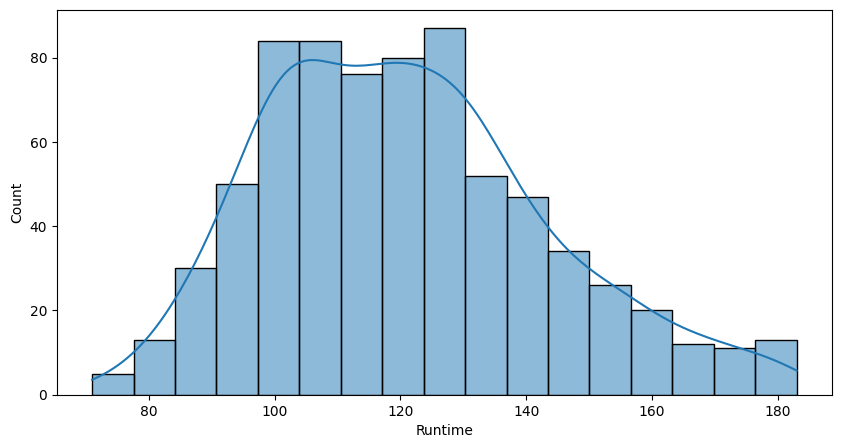

In [58]:
histograma(df['Runtime'])

#### Coluna **`Gross`**
- Primeiramente, vamos analisar a nossa coluna "Gross" aplicando o describe() e ver como está a distribuição dos seus valores.
- Depois, caso seja necessário, vamos remover ou filtrar os outliers.

In [59]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,7.240000e+02,724.0
mean,1995.487569,120.885359,7.926243,77.244475,950.146409,1019.160221,1023.400552,997.983425,3.385795e+05,74778128.0
std,19.300380,22.354849,0.279105,12.450495,585.368410,576.629585,576.137393,577.506571,3.389675e+05,112207424.0
min,1925.000000,71.000000,7.600000,28.000000,0.000000,11.000000,1.000000,3.000000,2.519800e+04,1305.0
25%,1986.000000,103.000000,7.700000,70.000000,411.000000,537.000000,506.000000,488.000000,8.895900e+04,5016434.5
50%,2001.000000,119.000000,7.900000,78.000000,897.000000,990.000000,1019.000000,1024.000000,2.239550e+05,32007616.0
75%,2010.000000,134.000000,8.100000,86.000000,1484.000000,1506.000000,1532.250000,1471.250000,4.836428e+05,100040782.0
max,2019.000000,183.000000,9.200000,100.000000,2023.000000,2019.000000,2019.000000,2022.000000,2.303232e+06,936662208.0


##### Observações:
- Como podemos ver acima, o Gross possui valores bem extremos. Com mínimo de 1305.0, máximo chegando em 936662208.0, e com desvio padrão de 112207424.0. Isso é péssimo para um modelo de previsão.
- Sendo assim, como 25% dos dados estão com 5016434.5 aproximadamente, vamos filtrar a tabela pegando a partir do Gross igual ou maior que 5016434.5. Já o máximo, apesar de 75% dos dados não passar de 200000000.0, vamos filtrar até uns 800000000.0, já que o máximo é 936662208.0.


In [60]:
df = df.loc[(df['Gross']>=5000000.0) & (df['Gross']<=800000000.0), :]
print(df.shape)

(543, 15)


### Encoding dos dados + Avaliando/Escolhendo o nosso modelo de previsão

In [61]:
categorical_features = ['Certificate', 'Genre', 'Director']
numerical_features = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
text_features = ['Overview']
colunas_ja_tratada = ['Star1', 'Star2', 'Star3', 'Star4']

# Transformação de variáveis categóricas
encoder = OneHotEncoder(handle_unknown='ignore')
# Normalização de variáveis numéricas
scaler = StandardScaler()
# Transformação de texto
tfidf = TfidfVectorizer(max_features=500)  # Limita a 500 features

# Pipeline para variáveis categóricas e numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),
        ('num', scaler, numerical_features),
        ('text', Pipeline(steps=[
            ('tfidf', TfidfVectorizer(max_features=500, stop_words='english'))
        ]), 'Overview')
    ])

# Definindo os modelos e os parâmetros para Grid Search
models = [
    ('RandomForest', RandomForestRegressor(), {
        'model__n_estimators': [50, 100],
        'model__max_depth': [None, 10, 20]
    }),
    ('GradientBoosting', GradientBoostingRegressor(), {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    }),
    ('SVR', SVR(), {
        'model__kernel': ['linear', 'rbf'],
        'model__C': [1, 5, 10],
        'model__gamma': ['scale', 'auto']
    }),
    ('XGBoost', XGBRegressor(), {  # Adicione esta linha
        'model__n_estimators': [50, 100, 125],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 5, 7]
    })
]

# Divisão dos dados
X = df[categorical_features + numerical_features + text_features + colunas_ja_tratada]
y = df['IMDB_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Executar Grid Search para cada modelo
best_models = {}
for name, model, params in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# Avaliação dos modelos
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Model")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
    print("Treino", model.score(X_train, y_train))
    print(f'Previsão: {r2_score(y_test, y_pred)*100}\n')

Best parameters for RandomForest: {'model__max_depth': 20, 'model__n_estimators': 100}
Best parameters for GradientBoosting: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Best parameters for SVR: {'model__C': 5, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best parameters for XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 125}

RandomForest Model
MAE: 0.12968720404881176
RMSE: 0.16329451086545224
Treino 0.93377128922177
Previsão: 74.70513862564299


GradientBoosting Model
MAE: 0.13397078851514393
RMSE: 0.16635902885543688
Treino 0.8644666856482076
Previsão: 73.74682194007282


SVR Model
MAE: 0.14099145113582637
RMSE: 0.18240371994494906
Treino 0.9101149282354042
Previsão: 68.43858153808155


XGBoost Model
MAE: 0.1349772094586574
RMSE: 0.1676140293746268
Treino 0.8735990842162433
Previsão: 73.34922368458565



### Testando o Modelo Escolhido + Aplicando Hiperparâmetros
-  O melhor modelo foi o XGBoost. A diferença entre os dados de treino e previsão são menores quando comparados com os demais modelos. 

In [90]:
# Pré-processamento
categorical_features = ['Certificate', 'Genre','Director']
numerical_features = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
text_features = ['Overview']
colunas_ja_tratada = ['Star1', 'Star2', 'Star3', 'Star4']

# Transformação de variáveis categóricas
ohe = OneHotEncoder(handle_unknown='ignore')
# Normalização de variáveis numéricas
scaler = StandardScaler()
# Transformação de texto
tfidf = TfidfVectorizer(max_features=500)  # Limita a 500 features

# Pipeline para variáveis categóricas e numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ohe, categorical_features),
        ('num', scaler, numerical_features),
        ('text', Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=500, stop_words='english'))]), 'Overview')]
)

# Pipeline completa com o modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(learning_rate=0.1, max_depth = 3, n_estimators = 100))
])

# Divisão dos dados
X = df[categorical_features + numerical_features + text_features + colunas_ja_tratada]
y = df['IMDB_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Treinamento do modelo
pipeline.fit(X_train, y_train)

# Avaliação do modelo
y_pred = pipeline.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print(f'Treino score: {pipeline.score(X_train, y_train)}')

print(f'y_pred: {r2_score(y_test, y_pred)*100}\n')

MAE: 0.13370512953592004
RMSE: 0.16835668430375625
Treino score: 0.8591886093991856
y_pred: 65.11976208312775



#### Dataframe de Comparação

In [91]:
df_comparacao = pd.DataFrame({
    'Original': y_test,
    'Previsão': y_pred.round(1)
})
display(df_comparacao.head(15))

,Original,Previsão
462,7.9,8.0
698,7.8,7.8
236,8.1,7.9
923,7.6,7.7
161,8.2,8.0
936,7.6,7.9
773,7.7,7.7
55,8.4,7.9
516,7.9,8.0
729,7.7,7.8


#### Visualização Gráfica do Funcionamento do nosso Modelo de Previsão

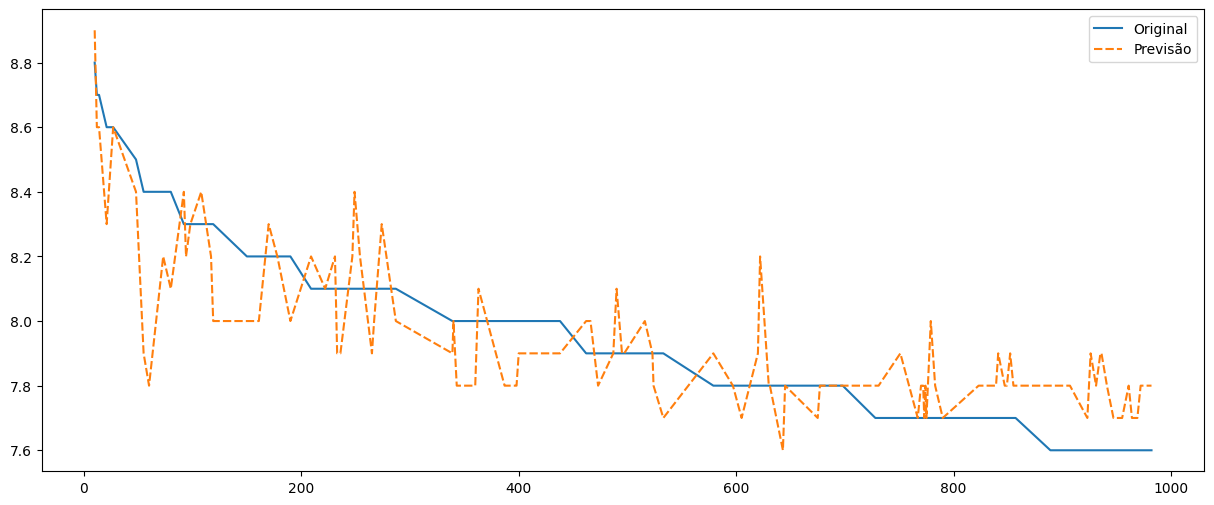

In [92]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df_comparacao)
plt.show()

#### Salvando o pipeline 

In [68]:
# Salvando o pipeline completa
import joblib
joblib.dump(pipeline, 'filme_pipeline.pkl')

['filme_pipeline.pkl']

### Prevendo Novos Dados com o Nosso Modelo

#### 4. Supondo um filme com as seguintes características:
```
 'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}
```
Qual seria a nota do IMDB?

In [69]:
# Carregar o pipeline salvo
pipeline = joblib.load('filme_pipeline.pkl')

In [70]:
# Dados do novo filme
new_movies_df = pd.DataFrame([{
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': 1994,
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': "Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}])

new_movies_df['Gross'] = int(new_movies_df['Gross'].str.replace(',', '')) #Substituindo a vírgula
new_movies_df['Runtime'] = float(new_movies_df['Runtime'].str.replace('min', '')) #Subitituindo o 'min'

df2 = new_movies_df.drop('Series_Title', axis=1)
# Fazer a previsão
predicted_ratings = pipeline.predict(df2)

# Adicionar as previsões ao DataFrame
new_movies_df['Predicted_IMDb_Rating'] = predicted_ratings.round(1)

display(new_movies_df[['Series_Title', 'Predicted_IMDb_Rating']].set_index('Series_Title'))

,Predicted_IMDb_Rating
Series_Title,
The Shawshank Redemption,8.8
